In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

%matplotlib inline

# Iris dataset

## Loading and setting data

In [2]:
data = load_iris()

#Input data
features = data['data']
#Input feature names
feature_names = data['feature_names']
#Labels
target = data['target']
#Description of dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Plotting scatter plots

In [3]:
def drawScatterSubPlots(features, feature_names, color, maxDims, labels, size = (15, 10)):
    '''Plot a set of scatter plots
     *** Parameters ***
     - features: Input data you use to plot
     - feature_names: Feature names of the input data, to be used as labels on x and y axis
     - color: Parameter to define colors on points
     - maxDims: A tuple (x, y) that defines the x subplots on a row and y subplots on a column
     - labels: Unique labels to define a legend
     - size: Parameter to define the size of the plot
    '''
  
    a, b = 0, 0
    gotHandles = False
    fig, axs = plt.subplots(maxDims[0], maxDims[1], figsize = size)

    for i in range(features.shape[1]):
        for j in range(i + 1, features.shape[1]):
            scatter = axs[a, b].scatter(features[:, i], features[:, j], c = color)
            if not gotHandles:
                handles, _ = scatter.legend_elements()
                gotHandles = True
            axs[a, b].set_xlabel(feature_names[i])
            axs[a, b].set_ylabel(feature_names[j])
            b += 1
            if b == maxDims[1]:
                b = 0
                a += 1

    fig.legend(handles, labels, loc='upper center')
    plt.show()

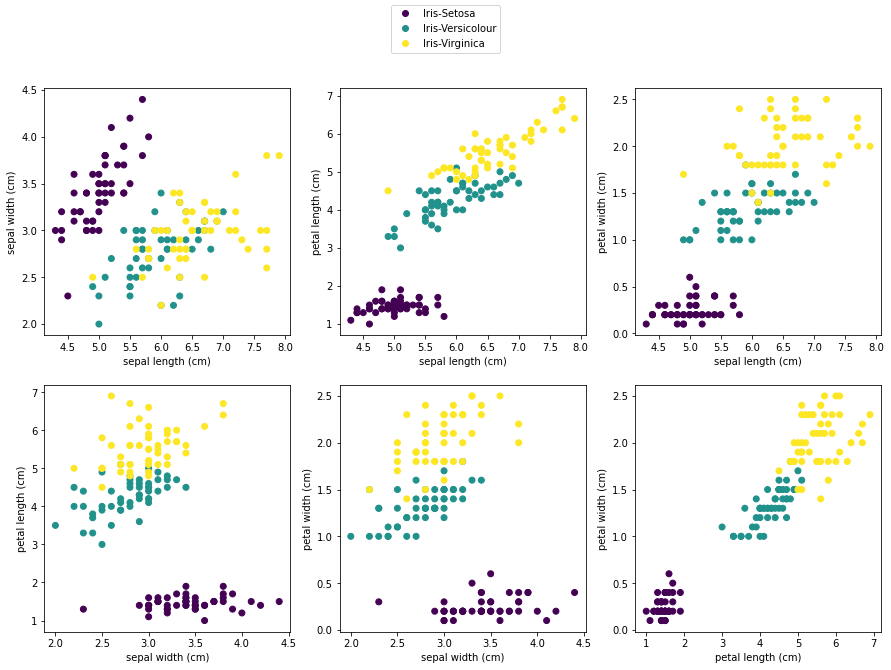

In [4]:
#This labels were created based on the description of the dataset
classes = ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica']
drawScatterSubPlots(features, feature_names, target, (2, 3), classes)

## Set a boundary based on the plots

In [5]:
plength = features[:, 2]
pwidth = features[:, 3]
labels = np.array(list(map(lambda x: classes[x], target)))

# Filter the data points of Iris-Setosa from the rest
is_setosa = (labels == 'Iris-Setosa')

#Check boundaries based on petal length
max_length_setosa =plength[is_setosa].max()
min_length_non_setosa = plength[~is_setosa].min()
print('Petal length')
print('------------')
print(f'Maximum petal length of iris-setosa: {max_length_setosa}.')
print(f'Minimum petal length of others: {min_length_non_setosa}.')
print()

#Check boundaries based on petal width
max_width_setosa =pwidth[is_setosa].max()
min_width_non_setosa = pwidth[~is_setosa].min()
print('Petal width')
print('------------')
print(f'Maximum petal width of iris-setosa: {max_width_setosa}.')
print(f'Minimum petal width of others: {min_width_non_setosa}.')

Petal length
------------
Maximum petal length of iris-setosa: 1.9.
Minimum petal length of others: 3.0.

Petal width
------------
Maximum petal width of iris-setosa: 0.6.
Minimum petal width of others: 1.0.


# Seeds dataset

In [6]:
#Data source: https://archive.ics.uci.edu/ml/datasets/seeds#
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                 names=['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coef', 'length_kernel_groove', 'target'],
                 sep = '\t')